In [2]:
import numpy as np  
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold 

# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.externals import joblib
# from keras import Sequential
# from keras.layers import LSTM, Dropout, Dense
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing 
# from xgboost import XGBRegressor, plot_importance



ModuleNotFoundError: No module named 'xgboost'

In [3]:
student_data = pd.read_csv('features.csv')

In [4]:
student_data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Portuguese,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Portuguese,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [5]:
# train.to_csv('student.csv', index=False)

In [6]:
lb=LabelEncoder()
lb.fit(student_data['FinalGrade'])
student_data['FinalGrade']=lb.transform(student_data['FinalGrade'])



In [7]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Portuguese,4,Always Regular,Failure,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Portuguese,4,Always Regular,Poor,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Portuguese,4,Always Regular,Satisfactory,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Portuguese,4,Always Regular,Satisfactory,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Portuguese,4,Always Regular,Satisfactory,Satisfactory


In [8]:
y=student_data[['FinalGrade']]
student_data = student_data.drop(['Regularity'],axis=1);
student_data = pd.get_dummies(student_data)
student_data = student_data.drop(['G3'],axis=1);
student_data = student_data.drop(['FinalGrade'],axis=1);


student_data.head()
# student_data = student_data.drop(['G2'],axis=1);
# student_data = student_data.drop(['G1'],axis=1);
# student_data = student_data.drop(['Regularity'],axis=1);

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,0,0,0,0,1,0,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,0,1,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(student_data,y,test_size=0.3,random_state=1)

In [10]:
y_train.shape

(730, 1)

In [11]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_predict=lr.predict_proba(x_val)


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# y_pred=y_pred.astype('int')


In [13]:
log_loss(y_val,y_predict)

0.5184060781428491

In [14]:
accuracy_score(y_val,y_pred)

0.821656050955414

In [15]:
# lr.score(x_val, y_val)

In [16]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)



E:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
accuracy_score(y_val,y_pred)

0.8184713375796179

In [18]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

forest = RandomForestClassifier(n_estimators=346, min_samples_leaf=2)
f = forest.fit(x_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(x_val, y_val))

<ipython-input-18-4aca899b62ff>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  f = forest.fit(x_train, y_train)


Raondom Forest Model Score : 0.9452054794520548 , Cross Validation Score : 0.8343949044585988


In [19]:
accuracy_score(y_val,y_pred)

0.8184713375796179

In [20]:
#log_loss(y_val,y_pred_prob)

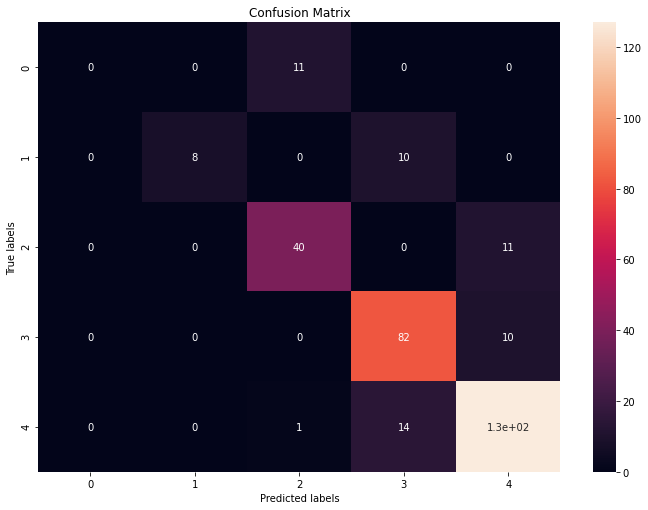

In [21]:
labels = list(range(0,5))
import seaborn as sns    
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [22]:
model = XGBClassifier()
model=XGBClassifier(learning_rate=0.1,n_estimators=100)
# kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = x_train[train_index], x_val[test_index] 
#       y_train, y_test = y_train[train_index], y_val[test_index]

# kfold = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=7)
# for traincv,testcv in kfold:
model.fit(x_train,y_train)


NameError: name 'XGBClassifier' is not defined

In [23]:
y_pred=model.predict(x_val)

NameError: name 'model' is not defined

In [ ]:
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)

plt.show()

In [ ]:
accuracy_score(y_val,y_pred)

In [ ]:
from sklearn.model_selection import KFold # import KFold
X = x_train
y = y_train
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
clf = model
cross_val_score(clf,x_train, y_train, cv=kf, n_jobs=1)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()